# Linear Regression Model using Statsmodels

In [36]:
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot

In [37]:
# Load cleaned data
df = pd.read_csv('https://raw.githubusercontent.com/songzimen/London_subjective-well-being_model/main/data/data_clean_standardized.csv')

In [38]:
# Define the independent and dependent variables
X = df.drop(columns=['ward_code', 'Ward', 'Subjective well-being average score Average'])

y = df['Subjective well-being average score Average']

# Add a constant column to the independent variables
X = sm.add_constant(X)

# create the regression model and fit it
model = sm.OLS(y, X).fit()

model_summary = model.summary()
print(model_summary)

                                         OLS Regression Results                                        
Dep. Variable:     Subjective well-being average score Average   R-squared:                       0.065
Model:                                                     OLS   Adj. R-squared:                  0.046
Method:                                          Least Squares   F-statistic:                     3.525
Date:                                         Thu, 11 Jan 2024   Prob (F-statistic):           4.47e-05
Time:                                                 20:35:38   Log-Likelihood:                -865.95
No. Observations:                                          625   AIC:                             1758.
Df Residuals:                                              612   BIC:                             1816.
Df Model:                                                   12                                         
Covariance Type:                                     nonrobust  

In [39]:
# Print all the coefficients of the model, with their names, only if their p-value is less than 0.05
for i in range(len(model.pvalues)):
    if model.pvalues[i] < 0.05:
        print(model.params.index[i], model.params[i])

Life Expectancy 2009-13 -0.11703666763113421
Unemployment rate Average -0.25391565533775873
population_per_hectare 0.26620865346379824
travel_work_bicycle -0.14056941411305016


/tmp/ipykernel_41703/3138578312.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if model.pvalues[i] < 0.05:
/tmp/ipykernel_41703/3138578312.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(model.params.index[i], model.params[i])


# Assumption Tests

In [20]:
# Load data
data = pd.read_csv('https://raw.githubusercontent.com/songzimen/London_subjective-well-being_model/main/data/data_clean_standardized.csv')

# select variables that p-value less than 0.05 in linear regreesion model
var_columns = ["Life Expectancy 2009-13", "Unemployment rate Average", 
                    "population_per_hectare", "travel_work_bicycle", 
                    "Subjective well-being average score Average"]
var_selected = df[var_columns]

## Assumption 1: Linear relationship between predictors and outcomes

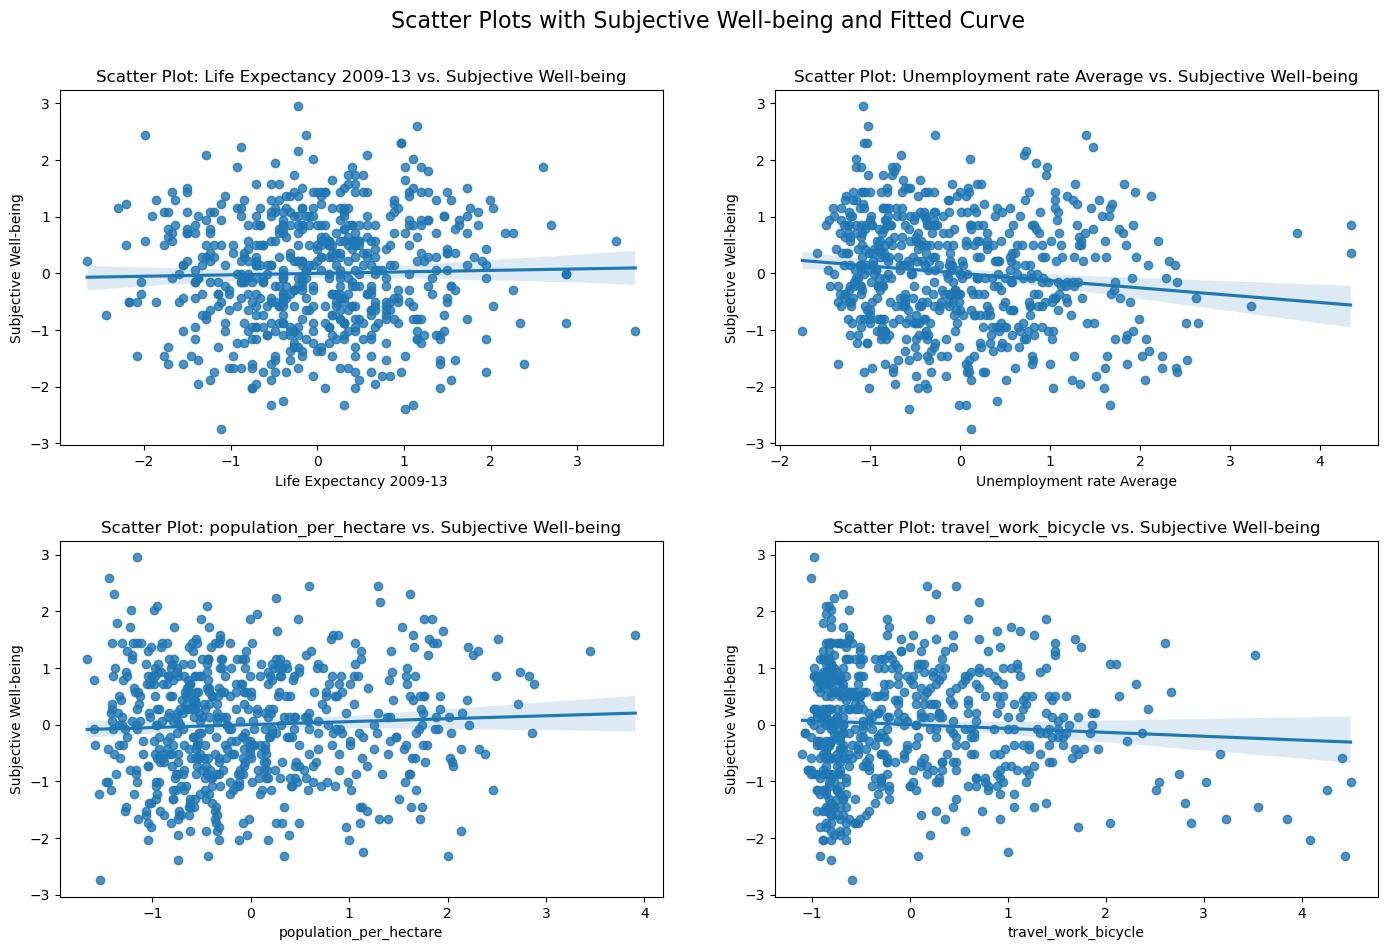

In [21]:
# Visually check their linearity
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.tight_layout(pad=5.0)

for i, column in enumerate(var_columns[:-1]):
    ax = axes[i//2, i%2]
    sns.regplot(x=var_selected[column], y=var_selected["Subjective well-being average score Average"], ax=ax)
    ax.set_title(f'Scatter Plot: {column} vs. Subjective Well-being')
    ax.set_xlabel(column)
    ax.set_ylabel("Subjective Well-being")

plt.subplots_adjust(top=0.9)
fig.suptitle('Scatter Plots with Subjective Well-being and Fitted Curve', fontsize=16)
plt.show()

We can initially confirm that they have linearity visually, though they are tend to be descrete.

## Assumption 2: Normally distributed error

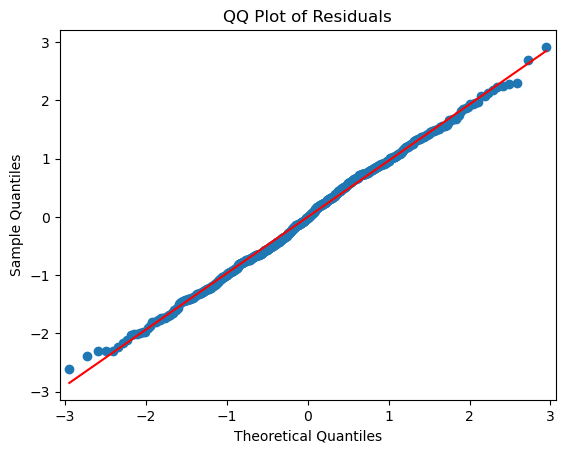

In [22]:
residuals = model.resid
qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

The Quantile-Quantile Plot (Q-Q plot) displays the distribution of the model residuals. 

Ideally, if the residuals are normally distributed, the data points should align roughly along the reference line. From the plot, it can be observed that the residuals largely follow this pattern, although there are some deviations at the extremes.

## Assumption 3: Homoscedasticity/Equal variance of errors

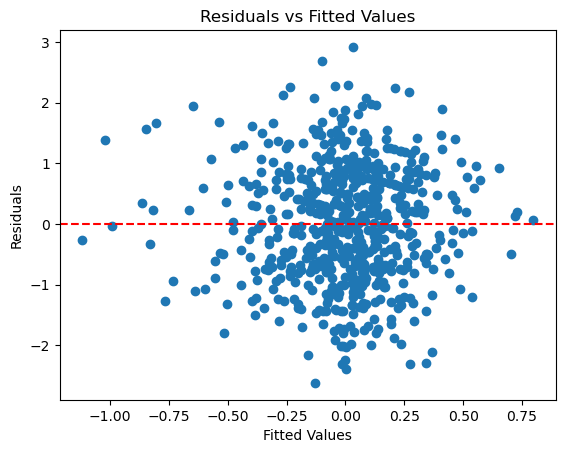

In [23]:
plt.scatter(model.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

By plotting a scatter plot of residuals against fitted values, we can check for homoscedasticity. Ideally, residuals should be randomly distributed with no apparent pattern. In this plot, the residuals do not seem to exhibit any obvious non-random patterns, which is a good sign. However, there are still some indications that the variance of the residuals is larger in certain areas of fitted values."

## Assumption 4: Independence of errors

In [24]:
# Durbin-Watson test
durbin_watson_stat = sm.stats.stattools.durbin_watson(residuals)
print("Durbin-Watson statistic:", durbin_watson_stat)

Durbin-Watson statistic: 1.5826844515242322


The value of the Durbin-Watson statistic is 1.583, which is close to 2. The Durbin-Watson statistic ranges from 0 to 4, where 2 indicates no autocorrelation. Therefore, this value suggests that there is a low degree of autocorrelation between the residuals, consistent with the assumption of independence.

## Conclusion

Considering all the above tests:

· Linear relationship: There is a linear relationship between independent variables and the dependent variable.
· Normality of residuals: Generally conforms, although there are slight deviations.
· Homoscedasticity: Largely conforms, though there are minor signs of heteroscedasticity.
· Independence: Good independence between residuals.

These results indicate that although the model is not perfect, it generally conforms to the assumptions of multiple linear regression.